In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import edge list

df = pd.read_csv('edges.csv')
df

,src,dst
0,1,2
1,1,3
2,2,4
3,2,5
4,5,7
5,3,6
6,8,9
7,8,10
8,10,11


In [3]:
# create directed graph from dataframe

G = nx.from_pandas_edgelist(df, source='src', target='dst', create_using=nx.DiGraph()) 
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 11
Number of edges: 9
Average in degree:   0.8182
Average out degree:   0.8182


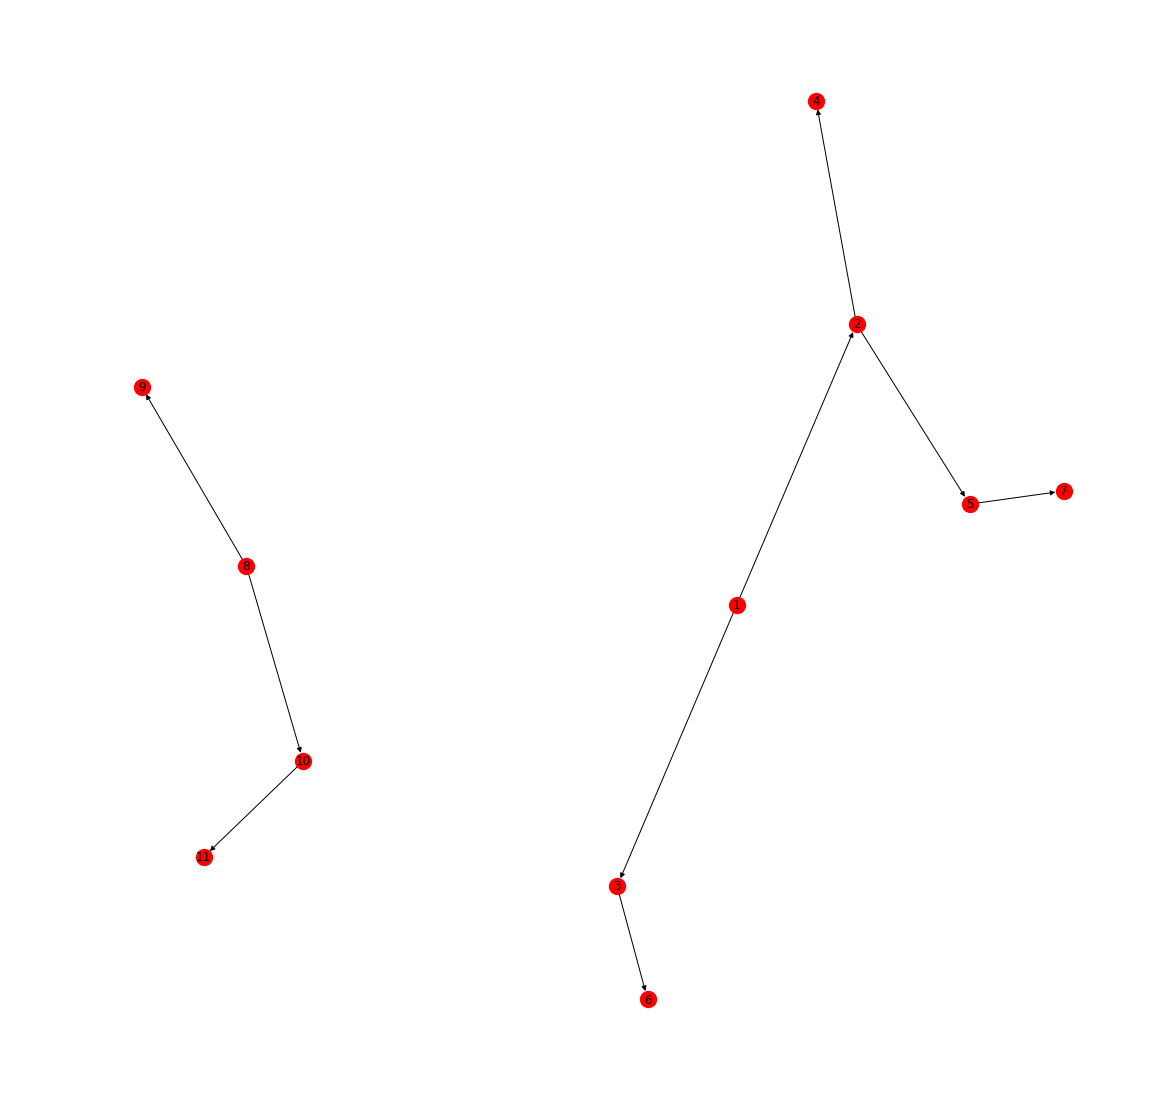

In [4]:
# visualize the network
pos = nx.spring_layout(G)
fig = plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw(G, pos, with_labels = True, width = 1, linewidths=0)

In [6]:
# find the max layers

max_layers = 0

for c in nx.weakly_connected_component_subgraphs(G):
    p = nx.dag_longest_path(c)
    print('longest path:', p)
    print('Number of layers:', len(p))

    if len(p)>max_layers:
        max_layers=len(p)
    
print('Maximum number of layers:', max_layers)

longest path: [1, 2, 5, 7]
Number of layers: 4
longest path: [8, 10, 11]
Number of layers: 3
Maximum number of layers: 4
